In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('winequality-red.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 11].values

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [5]:
print(y)

[5 5 5 ... 6 5 6]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [11]:
y_pred

array([6, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 7, 7, 6, 6, 6, 7, 6,
       6, 7, 5, 5, 5, 7, 5, 4, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 5, 7,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 7, 5,
       5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 5, 5, 6, 6, 5, 5,
       7, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6, 7,
       6, 7, 4, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 7, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 7, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 4, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 7, 6, 6, 6, 4, 6, 6, 7, 5, 7, 6, 6, 7, 6, 6, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [12]:
print(cm)

[[  0   0   2   0   0   0]
 [  0   2   7   3   2   0]
 [  0   0 108  58   3   0]
 [  0   2  52  91  25   0]
 [  0   1   4  16  19   0]
 [  0   0   2   3   0   0]]


In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.40      0.14      0.21        14
           5       0.62      0.64      0.63       169
           6       0.53      0.54      0.53       170
           7       0.39      0.47      0.43        40
           8       0.00      0.00      0.00         5

   micro avg       0.55      0.55      0.55       400
   macro avg       0.32      0.30      0.30       400
weighted avg       0.54      0.55      0.54       400



/Users/Vincent/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


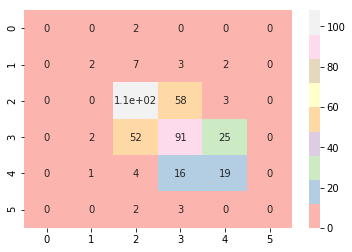

In [19]:
import seaborn as sns
cm_heatmap = sns.heatmap(cm, annot=True, cmap = 'Pastel1', linecolor = 'BrBG')